# Task №2
1. Develop yourself using numpy library: 
    - a function to implement gradient descent (GD) algorithm 
    - Adam's optimization algorithm 

for a function of two variables f(x,y).

2. Come up with a function of two variables of an arbitrary form and implement the search for its minimum using those implemented in p.1 functions - a) and b).
3. Illustrate the process of finding an extremum in the form of a graph of the dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N.

In [1]:
import numpy as np
from prettytable import PrettyTable
import matplotlib.pylab as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Goldstein-Price function

![alt text](Function.png "Goldstein-Price F")

In [2]:
def c(X, Y):
    return (19-14*X+3*X**2-14*Y+6*X*Y+3*Y**2)

def d(X, Y):
    return (18-32*X+12*X**2+48*Y-36*X*Y+27*Y**2)

def a(X, Y):
    return (1+(X+Y+1)**2 * c(X=X,Y=Y))

def b(X, Y):
    return (30+(2*X-3*Y)**2 * d(X=X,Y=Y))

def GP_function(X, Y):
    return (a(X=X,Y=Y)*b(X=X,Y=Y))

def GP_dfdx(X, Y):
    return (a(X=X,Y=Y)*((8*X-12*Y)*d(X=X,Y=Y)+(2*X-3*Y)**2*(24*X-32-36*Y))+b(X=X,Y=Y)*((2*X+2*Y+2)*c(X=X,Y=Y)+(X+Y+1)**2*(6*X-14+6*Y)))

def GP_dfdy(X, Y):
    return (a(X=X,Y=Y)*((18*Y-12*X)*d(X=X,Y=Y)+(2*X-3*Y)**2*(54*Y+48-36*X))+b(X=X,Y=Y)*((2*Y+2*X+2)*c(X=X,Y=Y)+(X+Y+1)**2*(6*Y+6*X+14)))

# gradient vector [df/dx, df/dy]
def GP_vector(x,y):
    return np.array([GP_dfdx(x,y), GP_dfdy(x,y)])

# Visualization

In [3]:
def contour_plot(obj_func,x_seq,y_seq, eq_dist):

    x = np.arange(-1.5, 1.5, 0.001)
    y = np.arange(-1.5, 1.5, 0.001)
    X, Y = np.meshgrid(x, y)
    Z = obj_func(X,Y)
    plt.figure(2, figsize=(20, 6))
    
    plt.subplot(121)
    CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.plot(x_seq,y_seq,'ro')

    plt.subplot(122)
    plt.plot( np.linspace(1, eq_dist.size, eq_dist.size), eq_dist)
    plt.show()


def print_plots_func(obj_func):
    x = np.arange(-1.5, 1.5, 0.1)
    y = np.arange(-1.5, 1.5, 0.1)
    X, Y = np.meshgrid(x, y)
    Z = obj_func(X,Y)

    fig = plt.figure(1, figsize = (20, 12))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                        cmap=cm.RdBu,linewidth=0, antialiased=False)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    fig.colorbar(surf, shrink = 0.7, aspect=5)
    plt.show()

# Gradient decent

In [4]:
def grad_descent_mult(x_prev,learn_rate,grad_vector):
    
    epsilon = 0.00001
    grad_itter = 1
    
    seq_x = [x_prev[0]]
    seq_y = [x_prev[1]]
    euc_dist = []

    x_next = x_prev - learn_rate*grad_vector(x_prev[0], x_prev[1])
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    
    while np.linalg.norm(x_next - x_prev) > epsilon:
        euc_dist = np.append(euc_dist, np.linalg.norm(x_next - x_prev))
        x_prev = np.around(x_next, decimals=20)
        x_next = x_prev - learn_rate*grad_vector(x_prev[0],x_prev[1])
        grad_itter += 1
        
        temp = []
        temp=[str(x_next[0]), str(x_next[1])]

        temp[0] = np.double(temp[0][:temp[0].find(".") + 10 ])
        temp[1] = np.double(temp[1][:temp[1].find(".") + 10 ])

        x_next = []
        x_next = [temp[0],temp[1]]

        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    
    return (x_next, grad_itter, np.around(seq_x, decimals=20), np.around(seq_y, decimals=20), euc_dist)

# Adam

In [5]:
# ADAM algorithm
beta_1 = 0.9
beta_2 = 0.999
epsilon = 0.00000001

def corr_val(value, coef, t):
    corr_val_x = value[0]/(1-coef**t)
    corr_val_y = value[1]/(1-coef**t)
    return np.array([corr_val_x,corr_val_y])

In [6]:
# ADAM algorithm

def adam_mult(x_prev,learn_rate,grad_vector):

    t_iter = 1
    
    seq_x = [x_prev[0]]
    seq_y = [x_prev[1]]
    euc_dist = []

    
    grad_vec = grad_vector(x_prev[0],x_prev[1])

    v_val = (1-beta_2) * np.power( grad_vec, 2) 
    s_val = (1-beta_1) * grad_vec

    v_val_corr = corr_val(v_val, beta_2, t_iter)
    s_val_corr = corr_val(s_val, beta_1, t_iter)

    x_next = x_prev - learn_rate * s_val_corr / (np.sqrt(v_val_corr) + epsilon)

    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    
    while np.linalg.norm(x_next - x_prev) > epsilon:
        euc_dist = np.append(euc_dist, np.linalg.norm(x_next - x_prev))

        x_prev = x_next

        grad_vec = grad_vector(x_prev[0],x_prev[1])

        v_val = beta_2*v_val + (1-beta_2) * np.power( grad_vec, 2)
        v_val_corr = corr_val(v_val, beta_2, t_iter)

        s_val = beta_1*s_val + (1-beta_1) * grad_vec
        s_val_corr = corr_val(s_val, beta_1, t_iter)

        x_next = x_prev - learn_rate * s_val_corr / (np.sqrt(v_val_corr) + epsilon)

        t_iter += 1
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    
    return (x_next, t_iter, seq_x, seq_y, euc_dist)

# Work

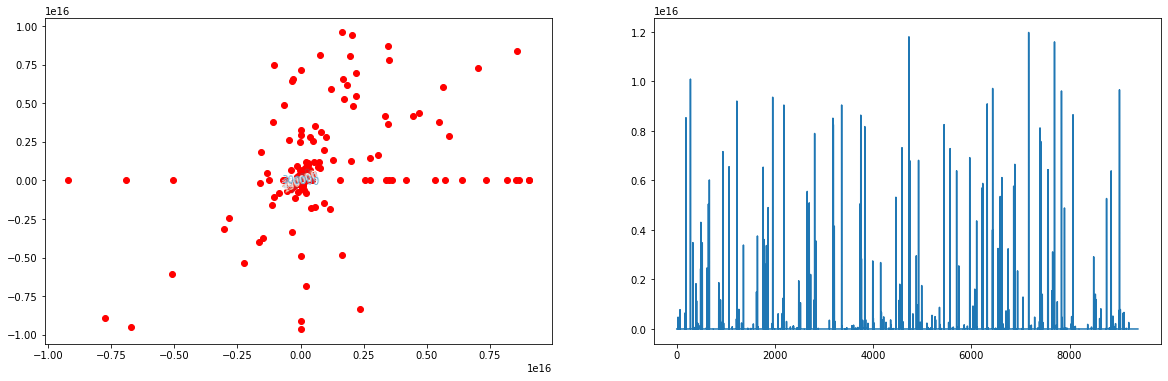

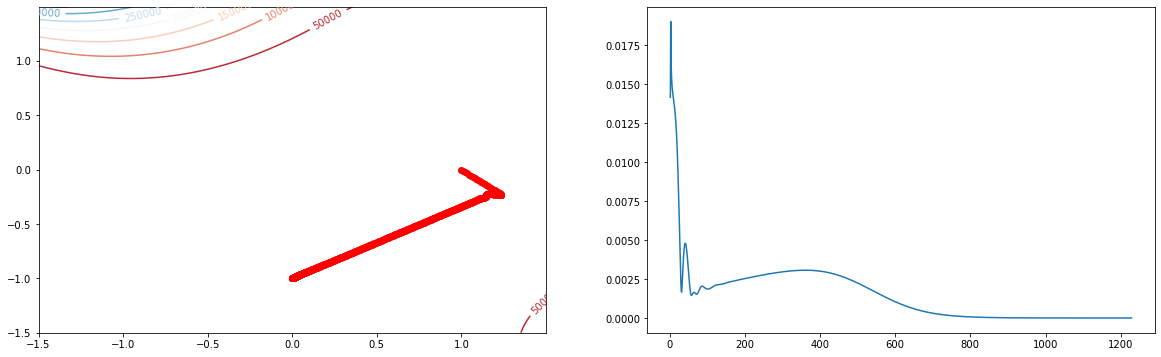

+---------------------------------------------+-----------------------------------+----------------+
|                  Algorithm                  |           Found Minimum           | Number of Iter |
+---------------------------------------------+-----------------------------------+----------------+
| <function grad_descent_mult at 0x124227280> |    [-0.000103186, -1.000048275]   |      9392      |
|     <function adam_mult at 0x124227ca0>     | [ 2.55976504e-07 -9.99999750e-01] |      1230      |
+---------------------------------------------+-----------------------------------+----------------+


/var/folders/1x/1zh1gh3s0gn4wj0d3z8q2x4m0000gn/T/ipykernel_4381/3877790784.py:26: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


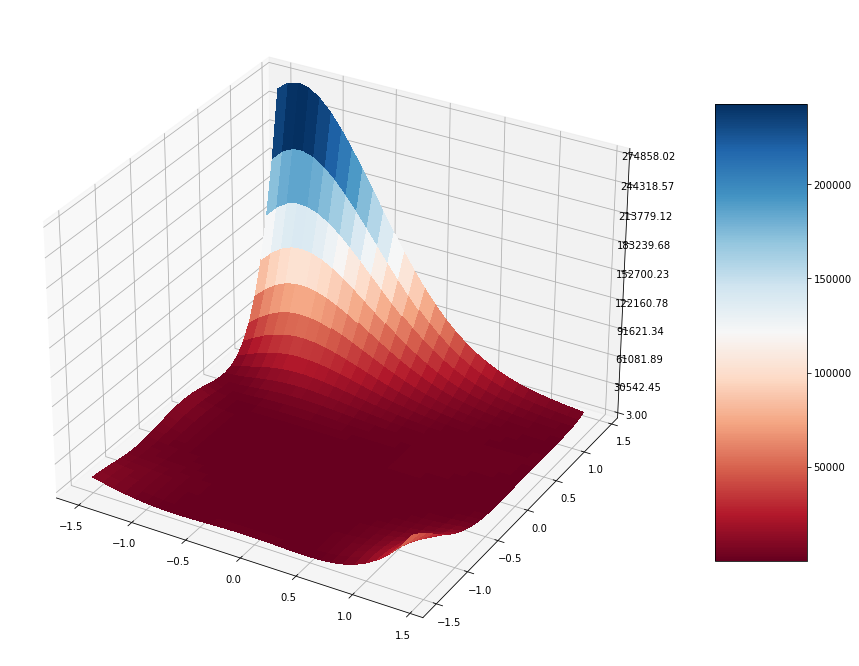

In [7]:
table = PrettyTable()

start_point = np.array([1, 0])
run = {
    grad_descent_mult: 0.0002,
    adam_mult: 0.01
}
table.field_names = ['Algorithm', 'Found Minimum', 'Number of Iter']
table.add_row(['real', '[0, -1]', 0])
for key in run.keys():
    final_point, num_iter, x_sequence, y_sequence, euc_distances = key(start_point, run[key], GP_vector)
    table.add_row([str(key), final_point, num_iter])
    contour_plot(GP_function, x_sequence, y_sequence, euc_distances)

print(table)
print_plots_func(GP_function)